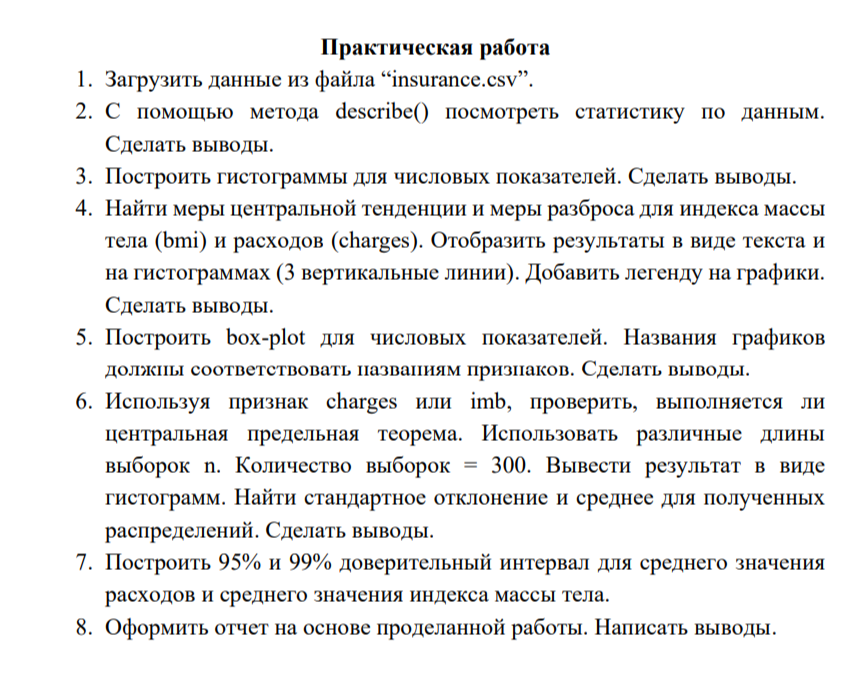

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [ ]:
data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Данные содержат информацию о 1338 клиентах страховой компании с характеристиками: возраст, пол, ИМТ, количество детей, статус курения, регион и медицинские расходы.

Распределение ИМТ близко к нормальному со средним значением 30.66, что находится на границе между избыточным весом и ожирением.

Распределение медицинских расходов сильно правостороннее асимметричное с большим количеством выбросов (очень высокие счета). Средние расходы - 13270



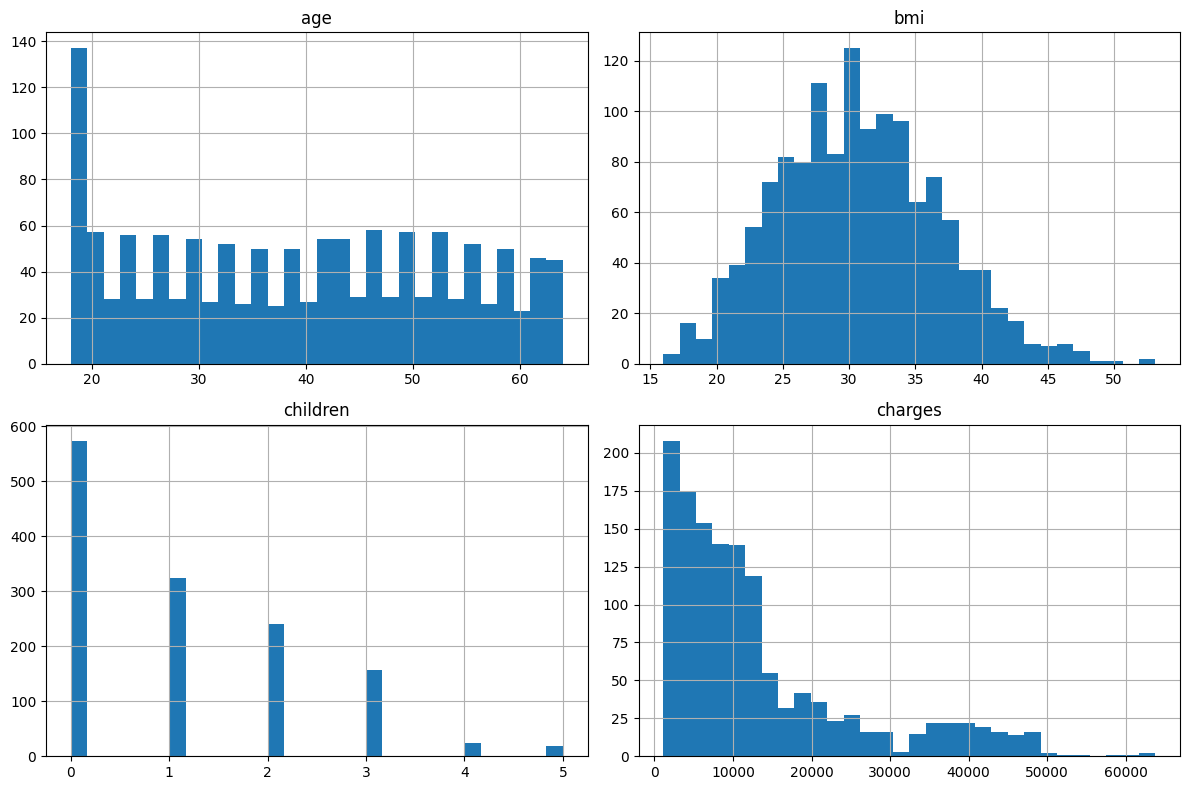

In [ ]:
#3. Гистограммы для числовых показателей
numeric_cols = ['age', 'bmi', 'children', 'charges']
data[numeric_cols].hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()

Возраст: распределение относительно равномерное

ИМТ: нормальное распределение с центром около 30

Дети: большинство клиентов имеют 0-2 детей

Расходы: правостороннее асимметричное распределение с длинным хвостом

:


Анализ для bmi:
Среднее: 30.66
Медиана: 30.40
Мода: 32.30
Стандартное отклонение: 6.10
Дисперсия: 37.19
Размах: 37.17
Межквартильный размах (IQR): 8.40


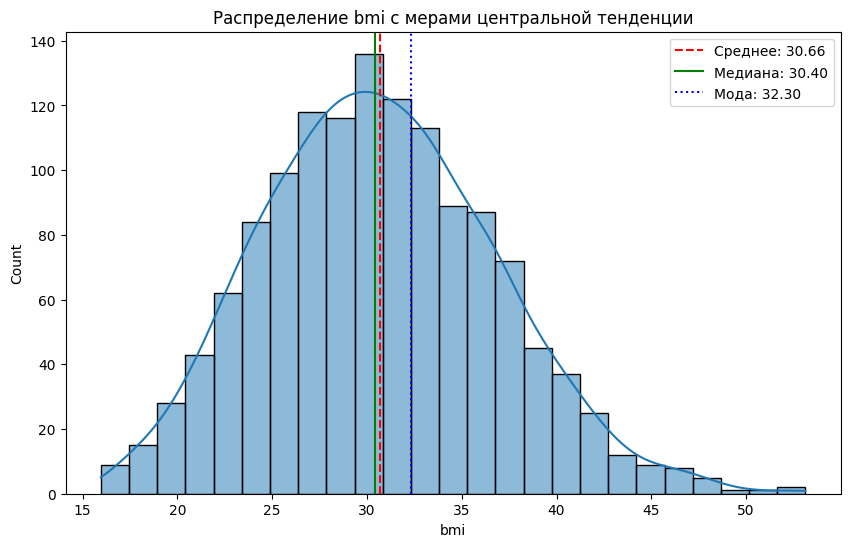


Анализ для charges:
Среднее: 13270.42
Медиана: 9382.03
Мода: 1639.56
Стандартное отклонение: 12110.01
Дисперсия: 146652372.15
Размах: 62648.55
Межквартильный размах (IQR): 11899.63


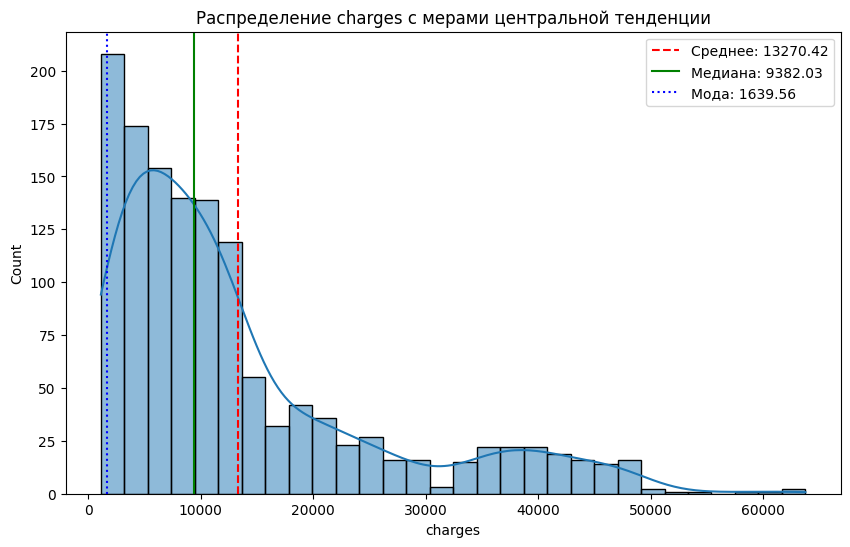

In [ ]:
# 4. Меры центральной тенденции и разброса для bmi и charges
def analyze_column(column):
    # Меры центральной тенденции
    mean = data[column].mean()
    median = data[column].median()
    mode = data[column].mode()[0]

    # Меры разброса
    std = data[column].std()
    var = data[column].var()
    data_range = data[column].max() - data[column].min()
    q1 = np.percentile(data[column], 25)
    q3 = np.percentile(data[column], 75)
    iqr = q3 - q1

    print(f"\nАнализ для {column}:")
    print(f"Среднее: {mean:.2f}")
    print(f"Медиана: {median:.2f}")
    print(f"Мода: {mode:.2f}")
    print(f"Стандартное отклонение: {std:.2f}")
    print(f"Дисперсия: {var:.2f}")
    print(f"Размах: {data_range:.2f}")
    print(f"Межквартильный размах (IQR): {iqr:.2f}")

    # Гистограмма с мерами центральной тенденции
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True)
    plt.axvline(mean, color='r', linestyle='--', label=f'Среднее: {mean:.2f}')
    plt.axvline(median, color='g', linestyle='-', label=f'Медиана: {median:.2f}')
    plt.axvline(mode, color='b', linestyle=':', label=f'Мода: {mode:.2f}')
    plt.title(f'Распределение {column} с мерами центральной тенденции')
    plt.legend()
    plt.show()

analyze_column('bmi')
analyze_column('charges')

Для bmi: среднее (30.66), медиана (30.40) и мода (32.30) близки, распределение близко к нормальному

Для charges: среднее (13,270) значительно выше медианы (9,382), что указывает на правостороннюю асимметрию

Стандартное отклонение для charges очень велико (12,110), что говорит о высокой вариативности расходов

In [ ]:
# 5. Box-plot для числовых показателей
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Возраст: равномерное распределение без выбросов

ИМТ: несколько выбросов в верхней части (ожирение)

Дети: большинство значений между 0 и 2

Расходы: множество выбросов в верхней части (очень высокие медицинские счета)

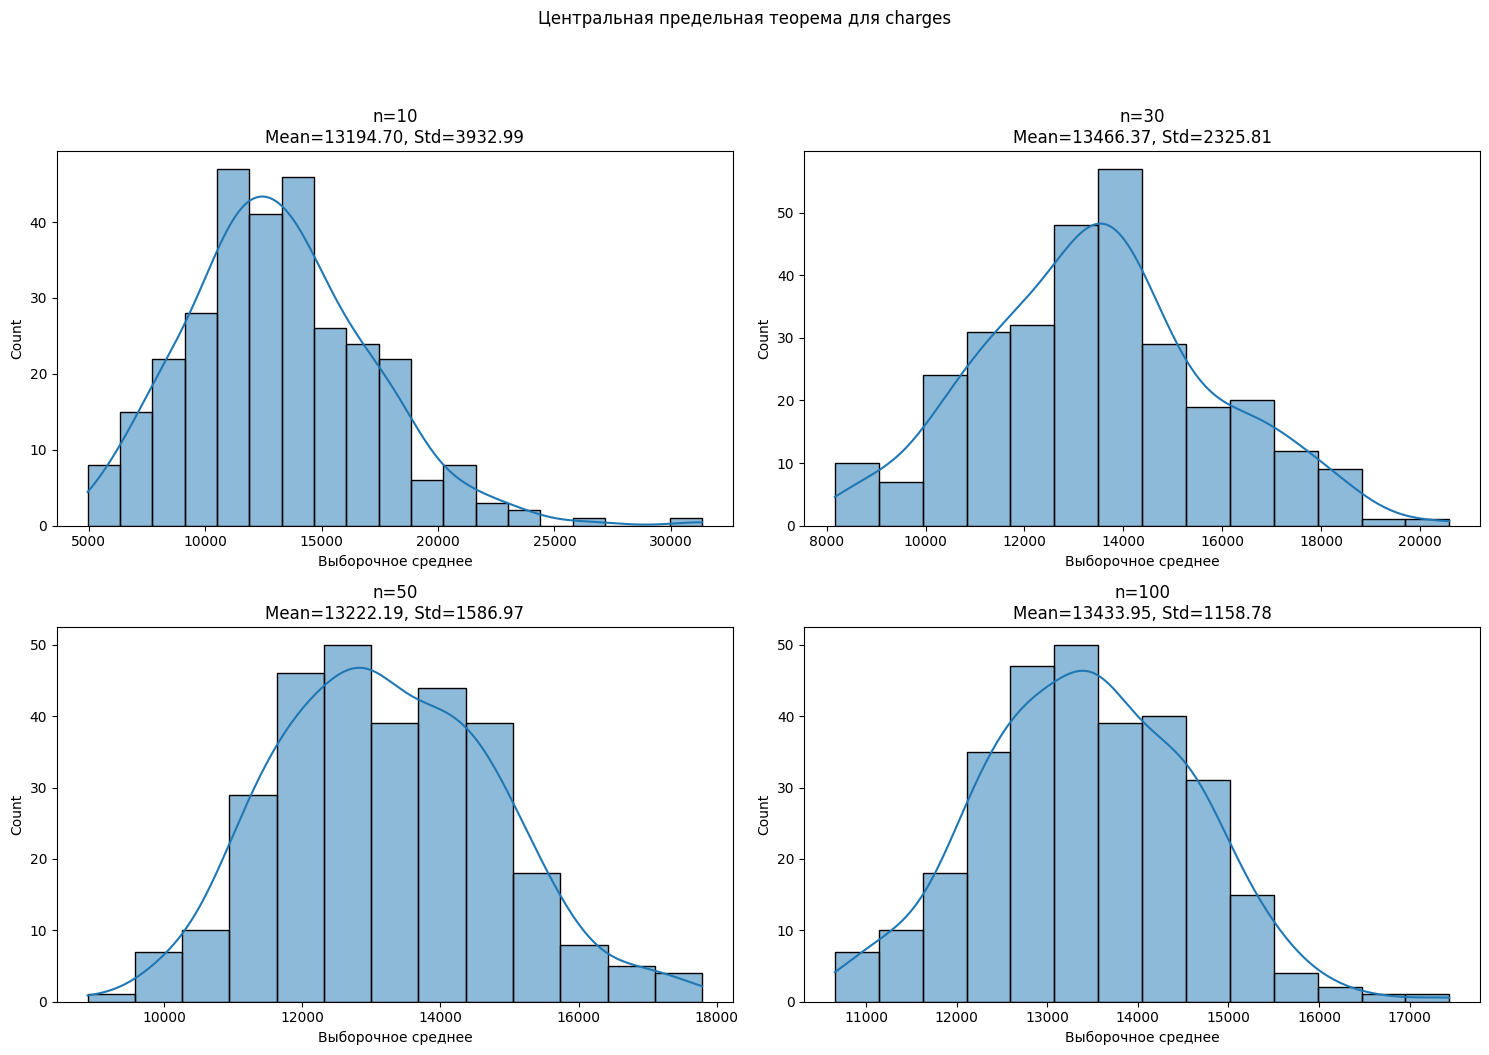

In [ ]:
# 6. Проверка центральной предельной теоремы для charges
def check_clt(column, sample_sizes=[10, 30, 50, 100]):
    plt.figure(figsize=(15, 10))
    population = data[column]

    for i, n in enumerate(sample_sizes, 1):
        sample_means = [np.mean(np.random.choice(population, n)) for _ in range(300)]

        plt.subplot(2, 2, i)
        sns.histplot(sample_means, kde=True)
        plt.title(f'n={n}\nMean={np.mean(sample_means):.2f}, Std={np.std(sample_means):.2f}')
        plt.xlabel('Выборочное среднее')

    plt.suptitle(f'Центральная предельная теорема для {column}', y=1.05)
    plt.tight_layout()
    plt.show()

check_clt('charges')

Центральная предельная теорема подтверждается - распределение выборочных средних стремится к нормальному с увеличением размера выборки.

Стандартное отклонение уменьшается с увеличением n

Среднее значение остается близким к среднему по генеральной совокупности

In [ ]:
# 7. Доверительные интервалы для среднего
def confidence_interval(column, confidence=0.95):
    n = len(data[column])
    mean = data[column].mean()
    std = data[column].std()
    sem = std / np.sqrt(n)

    if confidence == 0.95:
        z = 1.96
    elif confidence == 0.99:
        z = 2.576

    lower = mean - z * sem
    upper = mean + z * sem

    print(f"\n{confidence*100}% доверительный интервал для {column}:")
    print(f"Нижняя граница: {lower:.2f}")
    print(f"Верхняя граница: {upper:.2f}")
    print(f"Ширина интервала: {upper - lower:.2f}")

for conf in [0.95, 0.99]:
    confidence_interval('charges', conf)
    confidence_interval('bmi', conf)


95.0% доверительный интервал для charges:
Нижняя граница: 12621.53
Верхняя граница: 13919.31
Ширина интервала: 1297.78

95.0% доверительный интервал для bmi:
Нижняя граница: 30.34
Верхняя граница: 30.99
Ширина интервала: 0.65

99.0% доверительный интервал для charges:
Нижняя граница: 12417.59
Верхняя граница: 14123.25
Ширина интервала: 1705.66

99.0% доверительный интервал для bmi:
Нижняя граница: 30.23
Верхняя граница: 31.09
Ширина интервала: 0.86


Данные содержат информацию о 1338 клиентах страховой компании с характеристиками: возраст, пол, ИМТ, количество детей, статус курения, регион и медицинские расходы.

Распределение ИМТ близко к нормальному со средним значением 30.66, что находится на границе между избыточным весом и ожирением.

Распределение медицинских расходов сильно правостороннее асимметричное с большим количеством выбросов (очень высокие счета). Средние расходы - 13270, но медиана всего 9,382.

Центральная предельная теорема подтверждается - распределение выборочных средних стремится к нормальному с увеличением размера выборки.

Доверительные интервалы показывают, что с 95% уверенностью:

Средние медицинские расходы находятся между 12622 и 13920

Средний ИМТ находится между 30.33 и 30.99

Анализ выявил значительную вариативность медицинских расходов, что может быть связано с такими факторами как возраст, ИМТ и статус курения